Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Kai Yee"
COLLABORATORS = ""

---

# Data Science Individual Project
## Objective

Provide a data-driven solution to a problem that excites you using the tools discussed (or related to) in this course.

## Datasets
The dataset can be same or different with your group project. But you need to answer or provide additional solution to three questions.

## Tasks
For your project, you should:
- Pick a topic/issu and three questions that excites you
- Select or create datasets
- Familiarize yourself with that data, if necessary:
    - data munging
    - feature engineering
- Choose proper model, Train/Fit the model: NumPy, Pandas, Matplotlib, SciKit, OpenCV, Keras, TensorFlow (tf), catboost, DeepLearning4j, etc.
- Analyze results

## Deliverables
Deliverables for your project:

- Draft of report: 
    - Required: draft of introduction, datasets, methodology. 
    - Optional: draft of result, discussion

Due 12/1 (Friday), at 11:59 pm

More details about submission will be released before the due

- Final report: introduction, datasets, methodology, results, discussion/suggestion, reference + codes

Due last day of classes 12/7 (Thursday) at 11:59 pm

More details about the requirements of report will be release before the due

- Method 
    - Published code, pictures and report to a repository with readme [reference](https://docs.github.com/en/repositories/managing-your-repositorys-settings-and-features/customizing-your-repository/about-readmes)
    - if use private Github repo, must add 'veagy' by the following steps in [link](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-personal-account-on-github/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository)






## Rubric
|Category | Explanation| %|
|--|--|-|
|Introduction|Why was the project undertaken? What was the research question, the tested hypothesis or the purpose of the research?|10|
|Selection of Data|What is the source of the dataset? Characteristics of data? Any munging, imputation, or feature engineering?|20|
|Methods|What materials/tools were used in answering the research question?|20|
|Results|What answer was found to the research question; what did the study find? Any visualizations?|20|
|Discussion|What might the answer imply and why does it matter? How does it fit in with what other researchers have found? What are the perspectives for future research? |20|
|Coding|ipynb file with clear comments and datafile.|10|

Rubric based on the IMRAD:https://en.wikipedia.org/wiki/IMRAD

## Resources 

### Topics
 
Sample twitter sentiment report:
https://github.com/abdulfatir/twitter-sentiment-analysis/blob/master/docs/report.pdf

Articles from sites such as:
https://towardsdatascience.com/

https://medium.com

How to pick (or avoid) a DSc project
https://towardsdatascience.com/how-to-build-a-data-science-portfolio-5f566517c79c


### Datasets
Resources in Wentworth library. Links to existing datasets that can get you started
Kaggle.com, competitions, and datasets

https://www.kaggle.com/datasets

https://www.kaggle.com/competitions

Research-y
https://github.com/ChristosChristofidis/awesome-deep-learning#datasets

Aggravated (Amazon, Youtube, Yelp, Netflix, etc.)

https://www.reddit.com/r/datasets

Machine learning
https://registry.opendata.aws/

Local:

https://data.cityofboston.gov/

http://www.metrobostondatacommon.org/

https://catalog.data.gov/dataset

Internetional:

https://stats.oecd.org/

https://data.imf.org/?sk=388DFA60-1D26-4ADE-B505-A05A558D9A42&sId=1479329334655

https://www.who.int/data

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from difflib import get_close_matches
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [60]:
cic_data = pd.read_csv('data/Crime_in_Context.csv')
cic_data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


## What would be the Annual Crime Rate for Boston MA for the Next 10 Years?

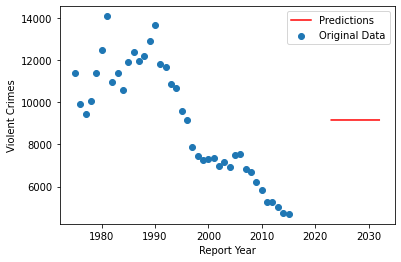

Predicted Violent Crimes for the Next Ten Years:
Year: 2023, Predicted Violent Crimes: 9153.798333775001
Year: 2024, Predicted Violent Crimes: 9153.964489502318
Year: 2025, Predicted Violent Crimes: 9153.994843416125
Year: 2026, Predicted Violent Crimes: 9153.999383409102
Year: 2027, Predicted Violent Crimes: 9153.999939360427
Year: 2028, Predicted Violent Crimes: 9153.999995099462
Year: 2029, Predicted Violent Crimes: 9153.999999674801
Year: 2030, Predicted Violent Crimes: 9153.99999998229
Year: 2031, Predicted Violent Crimes: 9153.999999999209
Year: 2032, Predicted Violent Crimes: 9153.99999999997


In [71]:
# Prepare the data
boston_data = cic_data[cic_data['agency_jurisdiction'] == 'Boston, MA']
boston_data = boston_data[['report_year', 'violent_crimes']]
boston_data['report_year'] = pd.to_numeric(boston_data['report_year'], errors='coerce')
boston_data['violent_crimes'] = pd.to_numeric(boston_data['violent_crimes'], errors='coerce')

# Remove rows with missing values
boston_data = boston_data.dropna()

# Flattens data to prepare for ML model
X = boston_data['report_year'].values.reshape(-1, 1)
y = boston_data['violent_crimes'].values

# Choose a model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X, y)

# Generate report years for prediction 2023-2032
future_years = np.arange(boston_data['report_year'].max() + 8, boston_data['report_year'].max() + 18).reshape(-1, 1)

# Predict violent crimes for these years
future_predictions = model.predict(future_years)

# Plot the original data and the predictions
plt.scatter(boston_data['report_year'], boston_data['violent_crimes'], label='Original Data')
plt.plot(future_years, future_predictions, label='Predictions', color='red')
plt.xlabel('Report Year')
plt.ylabel('Violent Crimes')
plt.legend()
plt.show()

# Display the predicted values for each year
print("Predicted Violent Crimes for the Next Ten Years:")
for year, prediction in zip(future_years.flatten(), future_predictions):
    print(f"Year: {int(year)}, Predicted Violent Crimes: {prediction}")

## What Crime would Likely Occur given a City and Time?

In [69]:
# Lists a Selection of Cities/States to choose from
print('City and State Selections:')
for jurisdiction in cic_data['agency_jurisdiction'].unique():
    print(jurisdiction)

City and State Selections:
Albuquerque, NM
Arlington, TX
Atlanta, GA
Aurora, CO
Austin, TX
Baltimore County, MD
Baltimore, MD
Boston, MA
Buffalo, NY
Charlotte, NC
Chicago, IL
Cincinnati, OH
Cleveland, OH
Columbus, OH
Dallas, TX
Denver, CO
Detroit, MI
El Paso, TX
Fairfax County, VA
Fort Worth, TX
Fresno, CA
Honolulu, HI
Houston, TX
Indianapolis, IN
Jacksonville, FL
Kansas City, MO
Las Vegas, NV
Long Beach, CA
Los Angeles County, CA
Los Angeles, CA
Memphis, TN
Mesa, AZ
Miami-Dade County, FL
Miami, FL
Milwaukee, WI
Minneapolis, MN
Montgomery County, MD
Nashville, TN
Nassau County, NY
New Orleans, LA
New York City, NY
Newark, NJ
Oakland, CA
Oklahoma City, OK
Omaha, NE
Orlando, FL
Philadelphia, PA
Phoenix, AZ
Pittsburgh, PA
Portland, OR
Prince George's County, MD
Raleigh, NC
Sacramento, CA
Salt Lake City, UT
San Antonio, TX
San Diego, CA
San Francisco, CA
San Jose, CA
Seattle, WA
St. Louis, MO
Suffolk County, NY
Tampa, FL
Tucson, AZ
Tulsa, OK
Virginia Beach, VA
Washington, DC
Wichita, KS
Lo

In [70]:
# Predicts crime order based on year and city/state
def predict_crime_order(city_state, year):
    # Check if the row exists in the dataset
    row_exists = (cic_data['agency_jurisdiction'] == city_state) & (cic_data['report_year'] == year)
    
    if row_exists.any():
        # Obtain the row
        row = cic_data[row_exists]

        # Extract crime values
        crime_values = row[['homicides', 'rapes', 'assaults', 'robberies']].values.flatten()

        # Order crime values from most to least likely
        ordered_crimes = [crime for crime in sorted(zip(crime_values, ['homicides', 'rapes', 'assaults', 'robberies']), reverse=True)]
        
    else:
        # Predict crime order based on available data
        X = cic_data[['report_year']].values.reshape(-1, 1)
        y_homicides = cic_data['homicides'].values
        y_rapes = cic_data['rapes'].values
        y_assaults = cic_data['assaults'].values
        y_robberies = cic_data['robberies'].values
        # Standardize the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # SVR model for homicides
        model_homicides = SVR(kernel='rbf', C=100, gamma=0.1)
        model_homicides.fit(X_scaled, y_homicides)

        # SVR model for rapes
        model_rapes = SVR(kernel='rbf', C=100, gamma=0.1)
        model_rapes.fit(X_scaled, y_rapes)

        # SVR model for assaults
        model_assaults = SVR(kernel='rbf', C=100, gamma=0.1)
        model_assaults.fit(X_scaled, y_assaults)

        # SVR model for robberies
        model_robberies = SVR(kernel='rbf', C=100, gamma=0.1)
        model_robberies.fit(X_scaled, y_robberies)

        # Standardize the input year and predict crime values
        scaled_year = scaler.transform(np.array([[year]]))

        predicted_homicides = int(model_homicides.predict(scaled_year)[0])
        predicted_rapes = int(model_rapes.predict(scaled_year)[0])
        predicted_assaults = int(model_assaults.predict(scaled_year)[0])
        predicted_robberies = int(model_robberies.predict(scaled_year)[0])
        
        if predicted_homicides < 0:
            predicted_homicides = 0
        if predicted_rapes < 0:
            predicted_rapes = 0
        if  predicted_assaults < 0:
            predicted_assaults = 0
        if predicted_robberies < 0:
            predicted_robberies = 0
            
        # Order predicted crime values from most to least likely
        ordered_crimes = sorted([(predicted_homicides, 'homicides'), (predicted_rapes, 'rapes'),
                                 (predicted_assaults, 'assaults'), (predicted_robberies, 'robberies')], reverse=True)
        
    # Generate output string
    output_string = f"The crime from most to least likely predicted in the year {year} in {city_state} is "
    output_string += ', '.join([f"{crime} ({count})" for count, crime in ordered_crimes])

    return output_string
    
# Data preprocessing to handle missing values
cic_data = cic_data.dropna(subset=['homicides', 'rapes', 'assaults', 'robberies'])


# Accept user inputs for city/state and year
user_city_state = input("Enter city/state: ")
user_year = int(input("Enter year: "))

# Validate and suggest options if necessary
valid_options = cic_data['agency_jurisdiction'].unique()
while user_city_state not in valid_options:
    suggestions = get_close_matches(user_city_state, valid_options)
    if suggestions:
        print(f"Did you mean one of these? {' | '.join(suggestions)}")
    user_city_state = input("Please enter a valid city/state: ")

# Predict and print the crime order
result = predict_crime_order(user_city_state, user_year)
print(result)

KeyboardInterrupt: 

## What is the Distribution of Crime given the population number?

In [66]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cic_data[['population']].values)

# SVR models for crimes
models = {
    'homicides': SVR(kernel='rbf', C=100, gamma=0.1),
    'rapes': SVR(kernel='rbf', C=100, gamma=0.1),
    'assaults': SVR(kernel='rbf', C=100, gamma=0.1),
    'robberies': SVR(kernel='rbf', C=100, gamma=0.1)
}

# Train SVR models
for crime, model in models.items():
    y = cic_data[crime].values
    model.fit(X_scaled, y)

# Accept population number from the user
population = float(input("Enter the population number: "))

# Standardize the input population and predict crime values
scaled_population = scaler.transform(np.array([[population]]))

# Predict crime values for the given population
predicted_values = {crime: int(model.predict(scaled_population)[0]) for crime, model in models.items()}

# Print the results
print(f"Predicted values for population {population}:")
for crime, predicted_value in predicted_values.items():
    print(f"{crime.capitalize()}: {predicted_value}")

Enter the population number: 98765
Predicted values for population 98765.0:
Homicides: 25
Rapes: 162
Assaults: 1520
Robberies: 1094
